In [29]:
# iris dataset으로 다항분류 후 모델 성능 성능 확인 : ROC 커브
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Sequential, Model
from keras.layers import Dense, Input


In [24]:
iris = load_iris()
# print(iris.keys())
# ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

x = iris.data
y = iris.target

# print(x[:2])
# print(y[:2])
# print(set(y)) # {0, 1, 2}

names = iris.target_names
print(names)

feature_names = iris.feature_names
print(feature_names)

# label OneHot 처리
onehot = OneHotEncoder(categories='auto') # to_categorical, numpy - np.eye(), pandas - pd.get_dummies()
print(x.shape)

y = onehot.fit_transform(y[:, np.newaxis]).toarray() # 2차원 이어야 한다 np.newaxis로 차원 확대
print(y.shape)
print(y[:2])

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# feature 표준화
scaler = StandardScaler() # 평균 0, 표준편차 1
x_scale = scaler.fit_transform(x)
print(x_scale[:2])

# train/test split
x_train, x_test, y_train, y_test = train_test_split(x_scale, y, test_size=0.3, random_state=1)


n_features = x_train.shape[1]
n_classes = y_train.shape[1]
print(n_features, n_classes)

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]]
4 3


In [32]:
# 모델 생성
def create_model_func(input_dim, out_dim, out_nodes, n, model_name='model'):
    # print(input_dim, out_dim, out_nodes, n, model_name)
    def create_model():
        model = Sequential(name=model_name)
        model.add(Input(shape=(input_dim, )))
        for _ in range(n):
            model.add(Dense(units=out_nodes, activation='relu'))
        
        model.add(Dense(units=out_dim, activation='softmax'))
        model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    return create_model

models = [create_model_func(n_features, n_classes, 10,n, 'model_{}'.format(n)) for n in range(1,4)]
print(len(models))

for creat_model in models:
    print()
    creat_model().summary()

3



2025-09-17 12:51:26.975313: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-17 12:51:26.982050: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-17 12:51:26.982461: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-17 12:51:26.983052: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-17 12:51:26.983345: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_dict = {}
for creat_model in models:
    model = creat_model()
    print(f'모델명 : {model.name}')
    historys = model.fit(x_train, y_train, epochs=50, batch_size=8, verbose=0, validation_split=0.2)
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f'test dataset loss : {score[0]:.4f}')
    print(f'test dataset acc : {score[1]*100:.4f}%')
    history_dict[model.name] = [historys, model]

# 레이어를 늘리니 loss 떨어지고 accuracy 증가했다.

print(history_dict)

모델명 : model_1
test dataset loss : 0.3657
test dataset acc : 80.0000%
모델명 : model_2
test dataset loss : 0.3508
test dataset acc : 80.0000%
모델명 : model_3
test dataset loss : 0.1643
test dataset acc : 95.5556%
{'model_1': [<keras.src.callbacks.history.History object at 0x31aaf9350>, <Sequential name=model_1, built=True>], 'model_2': [<keras.src.callbacks.history.History object at 0x32192ec90>, <Sequential name=model_2, built=True>], 'model_3': [<keras.src.callbacks.history.History object at 0x321906710>, <Sequential name=model_3, built=True>]}


h_d :  [0.4523809552192688, 0.488095223903656, 0.5, 0.5357142686843872, 0.5357142686843872, 0.5595238208770752, 0.5833333134651184, 0.6428571343421936, 0.6785714030265808, 0.7142857313156128, 0.726190447807312, 0.738095223903656, 0.738095223903656, 0.738095223903656, 0.738095223903656, 0.738095223903656, 0.738095223903656, 0.738095223903656, 0.75, 0.75, 0.761904776096344, 0.761904776096344, 0.7857142686843872, 0.7976190447807312, 0.8095238208770752, 0.8333333134651184, 0.8333333134651184, 0.8571428656578064, 0.8571428656578064, 0.8571428656578064, 0.8690476417541504, 0.8690476417541504, 0.8690476417541504, 0.8809523582458496, 0.8809523582458496, 0.8809523582458496, 0.8809523582458496, 0.8809523582458496, 0.8809523582458496, 0.8809523582458496, 0.8928571343421936, 0.8928571343421936, 0.8928571343421936, 0.8928571343421936, 0.9047619104385376, 0.9047619104385376, 0.9047619104385376, 0.9047619104385376, 0.9047619104385376, 0.9166666865348816]
h_d :  [0.0833333358168602, 0.095238097012043,

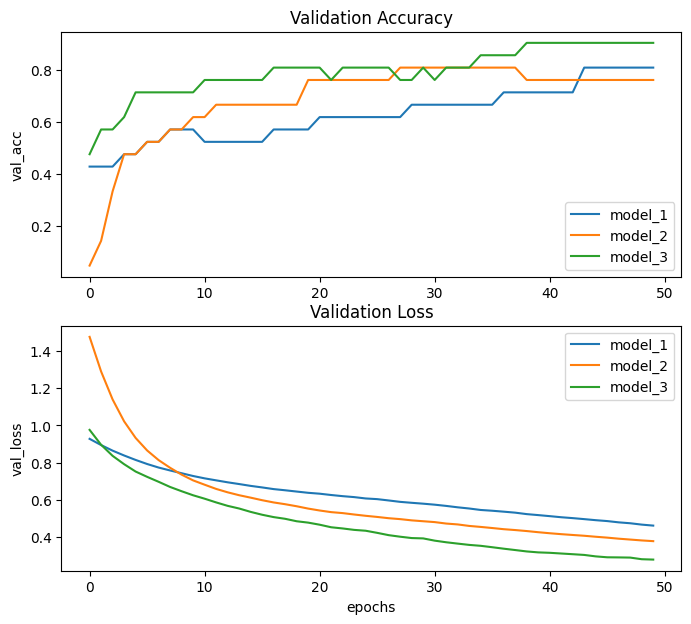

In [40]:
# 세 개 모델 시각화
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8,7))

for model_name in history_dict:
    print('h_d : ', history_dict[model_name][0].history['accuracy'])
    val_acc = history_dict[model_name][0].history['val_accuracy']
    val_loss = history_dict[model_name][0].history['val_loss']
        
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)

    ax1.set_ylabel('val_acc')
    ax2.set_ylabel('val_loss')
    ax2.set_xlabel('epochs')

ax1.set_title('Validation Accuracy')
ax2.set_title('Validation Loss')

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()





2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


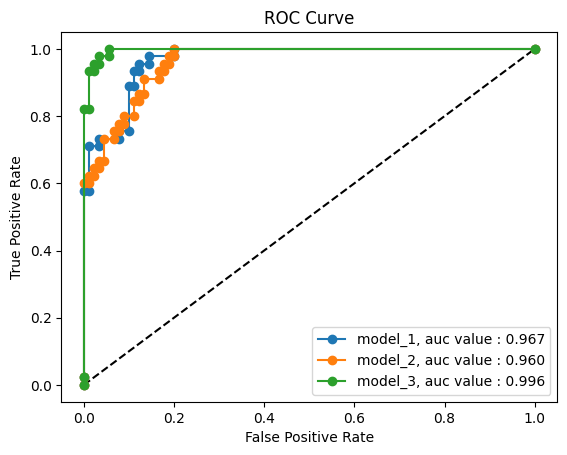

In [49]:
# ROC Curve : 분류기에 대한 성능 평가 방법 중 하나
from sklearn.metrics import roc_curve, auc

plt.figure()
plt.plot([0,1], [0,1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    y_pred = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_pred.ravel())
    plt.plot(fpr, tpr, 'o-', label='{}, auc value : {:.3f}'.format(model_name, auc(fpr, tpr)))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()